(168, 300, 3)


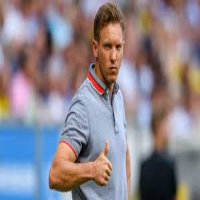

In [72]:
import cv2
import numpy as np
import random
import math
from google.colab.patches import cv2_imshow

img = cv2.imread('1.jpg')
print(img.shape)
img = cv2.resize(img, (200,200))
cv2_imshow(img)

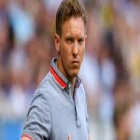

In [7]:
# Random Cropping
def RandomCropping(img, pct=0.1):
  crop_pct = 1 - pct
  x, y = img.shape[:2]
  x_new, y_new = round(x*crop_pct), round(y*crop_pct)

  dx, dy = random.random()*pct, random.random()*pct
  x_start, y_start = round(dx*x), round(dy*y)
  x_end, y_end = x_start+x_new, y_start+y_new
  crop_img = img[x_start:x_end, y_start:y_end]
  return crop_img

crop_img = RandomCropping(img, pct = 0.3)
cv2_imshow(crop_img)


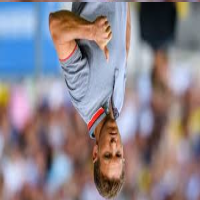

In [29]:
# Flipping
def Flipping(img, ftype):
  h,w,d = img.shape
  new_img = np.zeros(img.shape)
  if ftype == 'horizontal':
    for i in range(w):
      new_img[:,i,:] = img[:,-i+1,:]
  elif ftype == 'vertical':
    for i in range(h):
      new_img[i,:,:] = img[-i+1,:,:]
  return new_img

flipping_img = Flipping(img, 'vertical')
cv2_imshow(flipping_img)

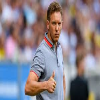

In [56]:
# Resize (Nearest Neighbour)
def Resize(img, new_size):
  if len(img.shape) == 3:
    h_in, w_in, d_in = img.shape
    h_out, w_out = new_size
    new_img = np.zeros((h_out, w_out, d_in))

  elif len(img.shape) == 2:
    h_in, w_in = img.shape
    h_out, w_out = new_size
    new_img = np.zeros((h_out, w_out))

  x_scale = h_in/ h_out
  y_scale = w_in/ w_out
  for x in range(w_out):
    for y in range(h_out):
      xp, yp = math.floor(x*x_scale), math.floor(y*y_scale)
      new_img[x,y] = img[xp,yp]
  return new_img

resize_img = Resize(img, (100,100))
cv2_imshow(resize_img)

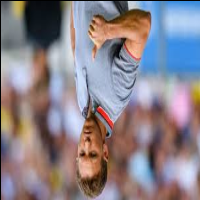

In [71]:
# Rotate
def Rotate(img, angle):
  angle = angle*np.pi/180
  h_in, w_in = img.shape[:2]
  new_img = np.zeros(img.shape)
  center_x = w_in/2
  center_y = h_in/2

  for x in range(w_in):
    for y in range(h_in):
      xp = int((x-center_x)*math.cos(angle) - (y-center_y)*math.sin(angle) + center_x)
      yp = int((x-center_x)*math.sin(angle) + (y-center_y)*math.cos(angle) + center_y)
      if 0 <= xp < w_in and 0<= yp < h_in:
        new_img[x,y] = img[xp,yp]
  return new_img

rotate_img = Rotate(img, 180)
cv2_imshow(rotate_img)



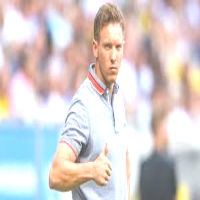

In [75]:
# Luminosity
def Luminosity(img, luminosity)
  h,w = img.shape[:2]
  new_img = np.zeros(img.shape)
  for x in range(w):
    for y in range(h):
      r,g,b = img[x,y]
      r = int(r+luminosity)
      g = int(g+luminosity)
      b = int(b+luminosity)
      new_img[x,y] = r,g,b
  return new_img
lum_img = Luminosity(img, -80)
cv2_imshow(new_img)


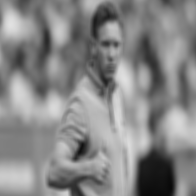

In [93]:
# Filtering
def compute_point(array, kernel):
  s, k = 0, 0

  for i in range(array.shape[0]):
    for j in range(array.shape[1]):
      s += array[i,j]*kernel[i,j]
      k += kernel[i,j]
  if k == 0:
    k = 1
  return s/k

def output_zero_array(img, kernel):
  h_out = img.shape[0] - kernel.shape[0] + 1
  w_out = img.shape[1] - kernel.shape[1] + 1 
  return np.zeros((h_out, w_out))

def take_array(img, kernel, point):
  i_start,j_start = point
  i_end, j_end = i_start + len(kernel), j_start+len(kernel)
  return img[i_start:i_end, j_start:j_end]

def Conv2D(img, kernel):
  output = output_zero_array(img, kernel)
  for i in range(output.shape[0]):
    for j in range(output.shape[1]):
      array = take_array(img, kernel, (i,j))
      output[i,j] = compute_point(array, kernel)
  return output


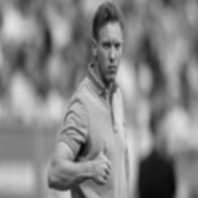

In [122]:
# Blurring
kernel = 1/9*np.ones((3,3))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = Conv2D(gray, kernel)
cv2_imshow(blur)

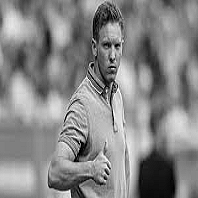

In [125]:
gaussian_kernel = [[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]]
gaussian_blur = Conv2D(gray, kernel)
cv2_imshow(gaussian_blur)

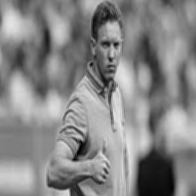

In [123]:
# Sharpening
kernel = np.array([[0, -0.5, 0], 
                   [-0.5, 3, -0.5], 
                   [0, -0.5, 0]])
sharpen = Conv2D(blur, kernel)
cv2_imshow(sharpen)

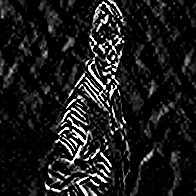

In [126]:
# Edge Detection
kernel_1 = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
kernel_2 = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
edge = Conv2D(Conv2D(gaussian_blur, kernel_1), kernel_2)
cv2_imshow(conv_img)